In [21]:
#importing the data
import pandas as pd
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\anaconda\New folder (2)\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

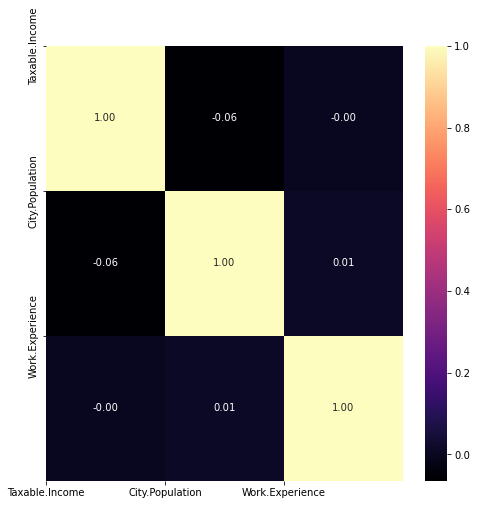

In [8]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Check Correlation amoung parameters
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))


# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

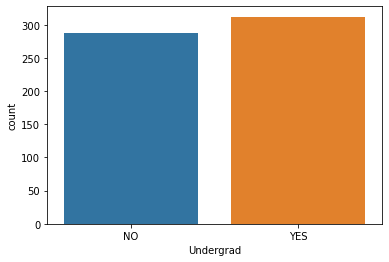

In [9]:
sns.countplot(df['Undergrad'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

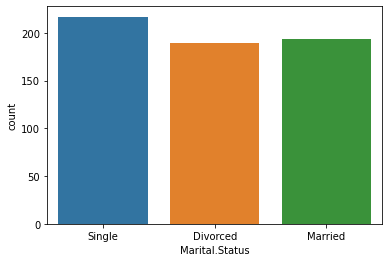

In [10]:
sns.countplot(df['Marital.Status'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

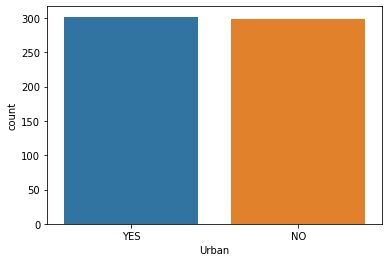

In [11]:
sns.countplot(df['Urban'])

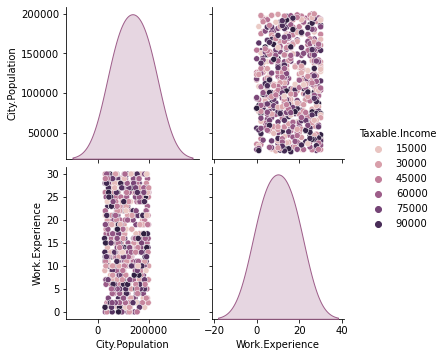

In [12]:
sns.pairplot(df,hue="Taxable.Income")
plt.show()

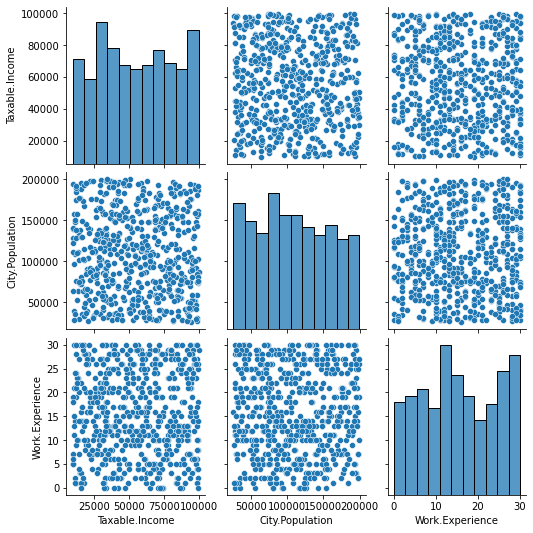

In [13]:
sns.pairplot(df)
plt.show()

In [22]:
#Encoding
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
df=encoder.fit_transform(df)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2


In [23]:
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
tax = []
for value in df["Taxable.Income"]:
    if value<=30000:
        tax.append("Risky")
    else:
        tax.append("Good")

df["tax"] = tax
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good


In [29]:
#splitting the data into x and y
x=df.drop(['Taxable.Income','tax'],axis=1)
y = df["tax"]

In [30]:
#Data Partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=(40))

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:",ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:",ac2.round(2))

training score: 0.82
test score: 0.76


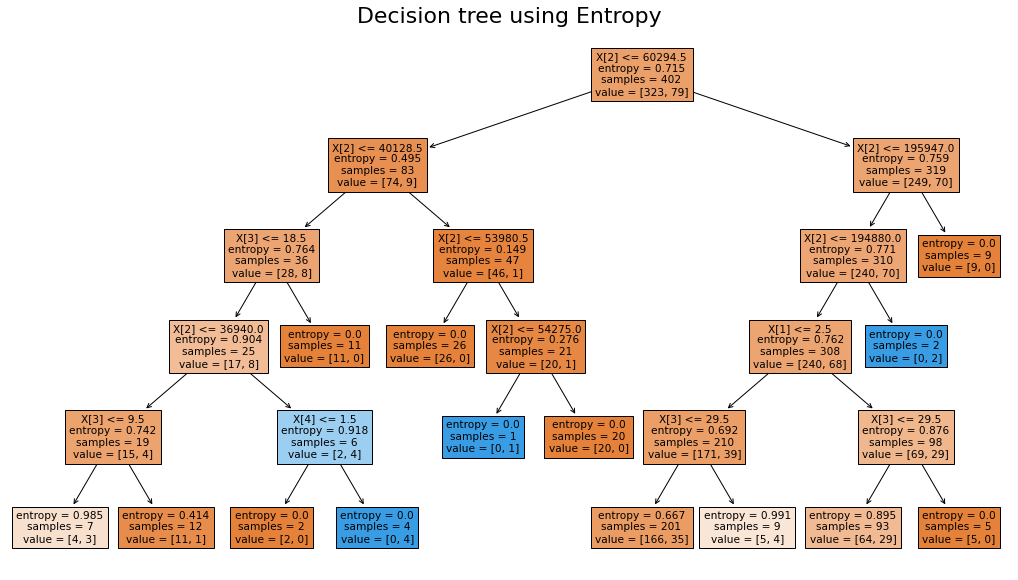

In [41]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(model,filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.show() 


In [43]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth=5)
model1.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=5)

In [44]:
y_pred_train = model1.predict(x_train)
y_pred_test = model1.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:",ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:",ac2.round(2))

training score: 0.83
test score: 0.77


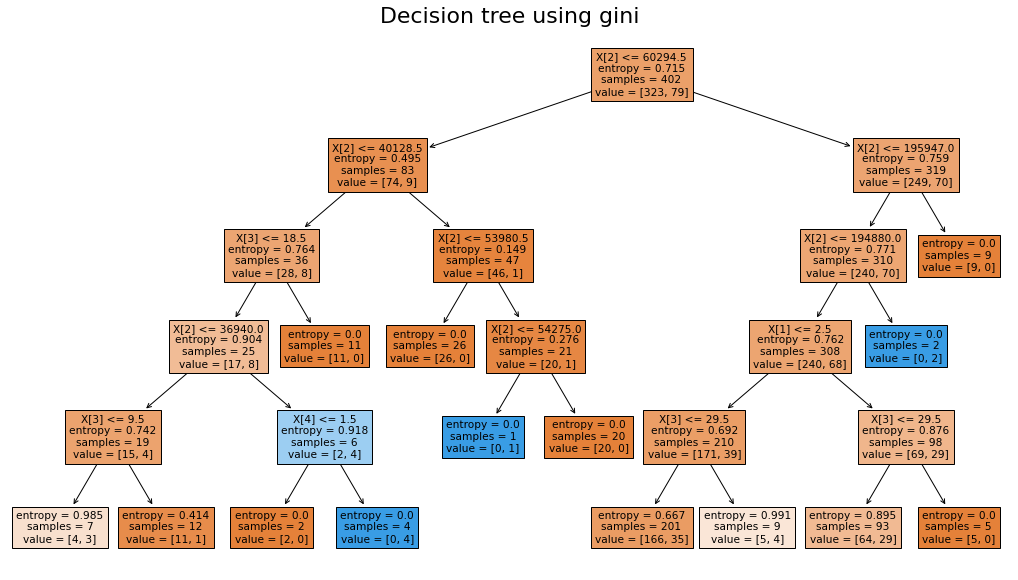

In [46]:
plt.figure(figsize=(18,10)) 
tree.plot_tree(model,filled=True)
plt.title('Decision tree using gini',fontsize=22)
plt.show() 


In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:",ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:",ac2.round(2))

training score: 0.8
test score: 0.77


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_train,y_pred_train)
print("training score:",ac1.round(2))
ac2 = accuracy_score(y_test,y_pred_test)
print("test score:",ac2.round(2))

training score: 0.81
test score: 0.77
